
## Megaline Revenue Analysis: Optimizing Plan Performance

## Business Context

As a data analyst for Megaline, a telecommunications operator, I've been tasked with conducting a comprehensive revenue analysis to support strategic decision-making in the commercial department. Megaline currently offers two prepaid plans to its customer base, and leadership needs data-driven insights to determine which plan generates higher revenue per customer for optimal advertising budget allocation.

## Plan Specifications

Megaline offers two distinct prepaid plans with different pricing structures and usage allowances:

### Surf Plan
- **Monthly Fee**: $20
- **Included Allowances**: 
  - 500 minutes per month
  - 50 SMS per month  
  - 15 GB of data per month
- **Overage Charges**:
  - Additional minutes: $0.03 per minute
  - Additional SMS: $0.03 per message
  - Additional data: $10 per GB

### Ultimate Plan
- **Monthly Fee**: $70
- **Included Allowances**:
  - 3,000 minutes per month
  - 1,000 SMS per month
  - 30 GB of data per month
- **Overage Charges**:
  - Additional minutes: $0.01 per minute
  - Additional SMS: $0.01 per message
  - Additional data: $7 per GB

### Billing Rules
**Important**: Megaline applies specific rounding rules for billing calculations:
- **Call Duration**: Individual calls are rounded up to the nearest minute (even 1-second calls count as 1 minute)
- **Data Usage**: Monthly data consumption is rounded up to the nearest GB (e.g., 1,025 MB usage = 2 GB billing)

## Dataset Overview

This analysis utilizes comprehensive customer data from 2018, encompassing 500 Megaline customers across five integrated datasets:

- **Users**: Customer demographics, registration dates, plan selection, and geographic location
- **Calls**: Detailed call records with duration and timestamps  
- **Messages**: SMS usage patterns and frequency
- **Internet**: Data consumption sessions and volumes
- **Plans**: Complete tariff specifications and pricing structures

## Analytical Objectives

The investigation addresses two critical business questions through statistical analysis:

1. **Plan Revenue Comparison**: Which prepaid plan (Surf vs. Ultimate) generates higher average monthly revenue?
2. **Geographic Revenue Analysis**: Do customers in the New York-New Jersey metropolitan area demonstrate different revenue patterns compared to other regions?

## Methodology

This analysis follows a systematic approach:

**Data Preparation**: Comprehensive data cleaning, type conversion, and monthly usage aggregation for accurate revenue calculations

**Behavioral Analysis**: Statistical examination of customer usage patterns including mean, variance, and distribution analysis with visualization

**Revenue Modeling**: Precise monthly revenue calculations incorporating base fees, allowances, and overage charges for each customer

**Hypothesis Testing**: Rigorous statistical testing to validate revenue differences between plans and geographic regions

## Expected Outcomes

This analysis will provide actionable insights for optimizing advertising spend allocation, supported by statistical evidence and clear recommendations for maximizing revenue growth across Megaline's prepaid customer base.

## Import Libraries

In [224]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st




## data loading and initial exploration

In [225]:
# loading datasets
df_users = pd.read_csv('../datasets/megaline_users.csv')
df_calls = pd.read_csv('../datasets/megaline_calls.csv')
df_internet = pd.read_csv('../datasets/megaline_internet.csv')
df_plans = pd.read_csv('../datasets/megaline_plans.csv')
df_messages = pd.read_csv('../datasets/megaline_messages.csv')

## Data explotation

## Plans

In [226]:
# exploring the plans dataset
df_plans.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [227]:
# printing the only 2 rows of the plans dataset
df_plans.sample(2)


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
1,1000,30720,3000,70,7,0.01,0.01,ultimate
0,50,15360,500,20,10,0.03,0.03,surf


In this DF there are no missing data, it is the description of our two tariffs that we have. The DF is clean, there's nothing to do to it, it has no missing values and it's not necessary to make any data type changes to the columns. Additionally, all are in snake_case format.


## Data Correction

This DataFrame doesn't need correction.

## Enrich the Data

No data enrichment is required for this dataframe at this stage, however, I performed the MB to GB conversion in a later step.

## Users

In [228]:
# exploring the users dataset
df_users.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [229]:
# printing the first 10 rows of the users dataset
df_users.sample(10)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
488,1488,Shirley,Jones,29,"Baton Rouge, LA MSA",2018-05-15,surf,NaN
82,1082,Dominic,Witt,64,"Memphis, TN-MS-AR MSA",2018-04-15,surf,NaN
93,1093,Karima,Hampton,69,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",2018-12-17,surf,NaN
421,1421,Zane,Hobbs,26,"Phoenix-Mesa-Chandler, AZ MSA",2018-05-18,surf,NaN
310,1310,Vincent,Fry,73,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-11-29,surf,NaN
217,1217,Ned,Thomas,69,"Dayton-Kettering, OH MSA",2018-06-04,surf,NaN
228,1228,Jude,Hale,26,"Detroit-Warren-Dearborn, MI MSA",2018-04-15,surf,NaN
111,1111,Booker,Hahn,75,"Urban Honolulu, HI MSA",2018-09-17,surf,NaN
345,1345,Pasquale,Caldwell,26,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-07-12,surf,NaN
168,1168,Shay,Weaver,58,"Milwaukee-Waukesha, WI MSA",2018-12-13,surf,NaN


churn_date and reg_date columns are in object format and should be dates. The missing values in churn_date are logical since the existence of a value in this field means that the plan was cancelled. I don't yet have enough data to conclude whether there could be a plan change for some users or if they are simply total service cancellations. But by changing these columns to date format, I could extract months, perform calculations, etc

### Data Correction

In [230]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format= '%Y-%m-%d', errors='coerce')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format= '%Y-%m-%d', errors='coerce')
df_users.info()
df_users.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
458,1458,Joella,Munoz,32,"Detroit-Warren-Dearborn, MI MSA",2018-07-24,ultimate,NaT
103,1103,Moises,Weeks,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-07-01,surf,NaT
449,1449,Boyd,Kelley,39,"Seattle-Tacoma-Bellevue, WA MSA",2018-10-04,surf,NaT
169,1169,Hai,Bean,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-12-06,surf,NaT
64,1064,Gerardo,Ashley,46,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-03,surf,NaT
210,1210,Shanae,Carrillo,30,"Oklahoma City, OK MSA",2018-06-01,surf,NaT
195,1195,Roy,Velez,60,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-06-09,surf,NaT
416,1416,Deja,Moss,25,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-10-03,surf,2018-11-21
19,1019,Shizue,Landry,34,"Jacksonville, FL MSA",2018-01-16,surf,NaT
371,1371,Roderick,Slater,27,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-10-27,surf,NaT


### Enrich the data

I added the registration months and cancellation months. I think they could be useful for us later to calculate the months during which each user was operating.

In [231]:
#extracting month from the registration and churn dates
#registration month
df_users['reg_month'] = df_users['reg_date'].dt.month
#churn month
df_users['churn_month'] = df_users['churn_date'].dt.month 

df_users.sample(10)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_month,churn_month
233,1233,Janee,Perkins,33,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-09-11,surf,NaT,9,NaN
311,1311,Cherlyn,Saunders,69,"Memphis, TN-MS-AR MSA",2018-06-27,ultimate,NaT,6,NaN
246,1246,Stevie,Moran,69,"Tampa-St. Petersburg-Clearwater, FL MSA",2018-01-09,ultimate,2018-07-31,1,7.0
23,1023,Jack,Delaney,70,"Omaha-Council Bluffs, NE-IA MSA",2018-07-06,surf,NaT,7,NaN
414,1414,Georgianne,Herring,30,"Urban Honolulu, HI MSA",2018-03-03,surf,2018-09-01,3,9.0
403,1403,Jae,Gardner,27,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-02-06,ultimate,NaT,2,NaN
90,1090,Brock,Skinner,30,"Indianapolis-Carmel-Anderson, IN MSA",2018-05-12,surf,NaT,5,NaN
99,1099,Shavon,Banks,48,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-26,surf,NaT,2,NaN
407,1407,Tristan,Daugherty,27,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-29,ultimate,NaT,11,NaN
375,1375,Andy,Holden,69,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-01,surf,NaT,12,NaN


## Calls

In [232]:
# exploring the calls dataset
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [233]:
# printing the first 10 rows of the calls dataset
df_calls.sample(10)




,id,user_id,call_date,duration
111004,1390_453,1390,2018-09-28,5.21
74507,1263_491,1263,2018-04-02,2.97
88440,1324_491,1324,2018-10-27,0.00
90297,1327_222,1327,2018-10-05,9.17
35431,1132_919,1132,2018-07-20,0.00
116750,1408_399,1408,2018-10-20,14.75
115476,1404_270,1404,2018-08-09,0.00
122197,1432_47,1432,2018-10-19,6.64
49629,1179_288,1179,2018-08-25,10.83
36295,1138_249,1138,2018-03-14,8.02


I notice there are calls with 0.0 duration, which could be calls that were made but didn't connect, the user hung up immediately, coverage errors, or even cases where the user dialed and the call recipient was 'busy'. These calls are definitely not charged, but I don't consider them as valid call records. I will not take these values into account as they can distort the information. Looking at the bottom part of the project, it clearly asks for statistical data, and calls that didn't connect are a form of empty values that can distort the information, since the sum of minutes is calculated based on calls that connected, but if calculations are later made including non-completed calls, we will have information bias

### Data Correction

In [234]:
# As an observation, the value 0.0166666 is the result of 1/60 (the decimal duration of 1 second)
# Ignore call values that were not completed:
df_calls = df_calls[df_calls['duration'] >= 0.0166666]
df_calls.info()



<class 'pandas.core.frame.DataFrame'>
Index: 110850 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         110850 non-null  object 
 1   user_id    110850 non-null  int64  
 2   call_date  110850 non-null  object 
 3   duration   110850 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [235]:
# After applying the filtering, we see that 26,885 calls were removed from the DF by applying the filter for calls lasting more than one second
# This would have caused bias errors in our statistical calculations.
# THE MEAN WOULD HAVE BEEN AFFECTED, THE MEDIAN TOO, AS WELL AS THE DIAGRAMS
# I MADE THE DECISION BECAUSE WHAT THE COMPANY IS INTERESTED IN ARE THE CALLS THAT ARE CHARGED... 1 SECOND IS ROUNDED UP TO ONE MINUTE BUT 0.0 < 1 SECOND

#This is the real value from which we are going to round up, 1 second. Since our dataframe is already filtered, then we are going to charge for the calls
#that have this duration onwards.
ceiling = np.ceil(0.016666) 
#We apply the company's billing policies: we verify the rounding of values to 1 minute starting from 1 second
print(ceiling) 
#reset index after filtering
df_calls = df_calls.reset_index(drop=True) 

1.0


In [236]:
#converting the call_date column to datetime format
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format= '%Y-%m-%d')
df_calls.info()

df_calls.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110850 entries, 0 to 110849
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         110850 non-null  object        
 1   user_id    110850 non-null  int64         
 2   call_date  110850 non-null  datetime64[ns]
 3   duration   110850 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.4+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


### Enrich the data

Data type conversion: applying Megaline's billing policy 
where each call is rounded from seconds to full minutes.
We also extract the month to facilitate subsequent monthly revenue calculations.

In [237]:
#rounding up the duration of calls to the nearest minute according to the company's billing policies.
df_calls['duration_round'] = np.ceil(df_calls['duration']) 
df_calls.sample(10)

,id,user_id,call_date,duration,duration_round
55863,1249_152,1249,2018-05-29,12.76,13.0
6096,1036_125,1036,2018-10-30,9.53,10.0
78568,1348_207,1348,2018-12-04,15.73,16.0
49324,1220_557,1220,2018-08-22,10.66,11.0
15992,1076_147,1076,2018-10-13,11.80,12.0
66382,1299_56,1299,2018-10-04,1.72,2.0
40139,1180_244,1180,2018-12-09,14.80,15.0
55433,1247_140,1247,2018-09-27,13.26,14.0
64283,1285_220,1285,2018-08-20,4.79,5.0
64661,1289_60,1289,2018-12-09,9.24,10.0


In [238]:
df_calls['call_month'] = df_calls['call_date'].dt.month
df_calls.sample(5)

,id,user_id,call_date,duration,duration_round,call_month
50423,1224_210,1224,2018-10-09,10.45,11.0,10
8091,1045_301,1045,2018-11-09,6.50,7.0,11
87152,1382_1485,1382,2018-07-07,4.48,5.0,7
5268,1031_135,1031,2018-12-03,2.43,3.0,12
49629,1222_196,1222,2018-11-11,4.86,5.0,11


## Messages

In [239]:
# exploring the internet dataset
df_messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [240]:
# printing the first 5 rows of the messages dataset
df_messages.sample(5)


,id,user_id,message_date
13562,1090_69,1090,2018-07-31
46226,1316_24,1316,2018-09-28
63663,1405_424,1405,2018-12-26
978,1008_25,1008,2018-11-22
52739,1336_774,1336,2018-06-18


### Data Correction

Cambiar el tipo de fecha (object) a datetime64

In [241]:
# changing the data type to date
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_messages.info()
df_messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


### Enrich the data

Add month for future calculation

In [242]:
df_messages['message_month'] = df_messages['message_date'].dt.month
df_messages.sample(5)

,id,user_id,message_date,message_month
61862,1385_326,1385,2018-10-04,10
68456,1442_28,1442,2018-12-22,12
21285,1132_564,1132,2018-07-02,7
22250,1133_202,1133,2018-12-13,12
25696,1155_58,1155,2018-12-10,12


## Internet

In [243]:
# exploring the internet dataset
df_internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [244]:
#  printing the first 5 rows of the internet dataset
df_internet.sample(5)


,id,user_id,session_date,mb_used
240,1001_458,1001,2018-10-03,479.82
80602,1377_27,1377,2018-12-26,3.44
40140,1181_287,1181,2018-12-05,438.32
34033,1155_56,1155,2018-06-20,549.21
85485,1399_92,1399,2018-09-23,607.84


Same case as in the previous DFs, we need to change the date data type and it wouldn't be bad to add one more column for future operations.

In [245]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_internet.info()
df_internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


### Enrich th data

Add month column

In [246]:
#extracting month from the session date
df_internet['session_month'] = df_internet['session_date'].dt.month
df_internet.info()
df_internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             104825 non-null  object        
 1   user_id        104825 non-null  int64         
 2   session_date   104825 non-null  datetime64[ns]
 3   mb_used        104825 non-null  float64       
 4   session_month  104825 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(1)
memory usage: 3.6+ MB


,id,user_id,session_date,mb_used,session_month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


## Study the plan conditions

In [247]:

# Call duration billing: seconds are rounded up to full minutes (1 second = 1 minute)
# This per-call rounding is why we created the 'duration_round' column during data enrichment
# Data usage billing: megabytes are rounded up to the next GB (1025 MB = 2 GB, where 1 GB = 1024 MB)
# Web sessions: no rounding applied, total monthly usage is simply summed

#megabytes to gigabytes conversion
gb_mb = 1024

#Surf Plan:
pago_mensual_surf = 20
minutos_surf = 500
mensajes_surf = 50
internet_surf_gb = 15
costo_minuto_extra_surf = .03
costo_mensaje_extra_surf = .03
costo_gb_extra_surf = 10

#Ultimate Plan:
pago_mensual_ultimate = 70
minutos_ultimate = 3000
mensajes_ultimate = 1000
internet_ultimate_gb = 30
costo_minuto_extra_ultimate = .01
costo_mensaje_extra_ultimate = .01
costo_gb_ultimate = 7




## Add data by user


In [248]:
# Calculate the number of calls made by each user per month. Save the result.
calls_per_user_month = df_calls.groupby(['user_id','call_month']).size()


df_calls_per_user_month = calls_per_user_month.reset_index()
df_calls_per_user_month.columns = ['user_id', 'month', 'num_calls']



#explore the structure of the df_calls_per_user_month data frame
df_calls_per_user_month.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   user_id    2256 non-null   int64
 1   month      2256 non-null   int32
 2   num_calls  2256 non-null   int64
dtypes: int32(1), int64(2)
memory usage: 44.2 KB


In [249]:
# Test of the resulting series (keeping this for testing purposes to verify that calls per month and user maintain proper ID correspondence in the newly created DataFrame)
calls_per_user_month.tail(15)

user_id  call_month
1498     2             28
         3             29
         4             42
         5             29
         6             29
         7             40
         8             37
         9             39
         10            37
         11            29
         12            32
1499     9             35
         10            41
         11            39
         12            56
dtype: int64

In [250]:
# Quick test to verify the newly created DF has no missing ID values, as I plan to merge it later with
# other dataframes that will follow this same process.
# Searching for a specific ID to verify it matches the records from the previous code cell
print(df_calls_per_user_month[df_calls_per_user_month['user_id'] == 1498])

      user_id  month  num_calls
2241     1498      2         28
2242     1498      3         29
2243     1498      4         42
2244     1498      5         29
2245     1498      6         29
2246     1498      7         40
2247     1498      8         37
2248     1498      9         39
2249     1498     10         37
2250     1498     11         29
2251     1498     12         32


In [251]:
# Calculate the total minutes used by each user per month. Store the result.
minutes_per_user_month = df_calls.groupby(['user_id','call_month'])['duration_round'].sum() # Apply sum to the duration_round field since
# billing policy rounds up partial minutes (e.g., 1 second call = 1 full minute charge), so we sum the rounded values

df_minutes_per_user_month = minutes_per_user_month.reset_index()
df_minutes_per_user_month.columns = ['user_id', 'month', 'minutes_used'] # Assign column names (same approach as previous case)

# Explore the structure of the minutes per user per month data frame
df_minutes_per_user_month.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       2256 non-null   int64  
 1   month         2256 non-null   int32  
 2   minutes_used  2256 non-null   float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 44.2 KB


In [252]:
#print minuites per user per month for testing purposes
minutes_per_user_month.head(10)

user_id  call_month
1000     12             124.0
1001     8              182.0
         9              315.0
         10             393.0
         11             426.0
         12             412.0
1002     10              59.0
         11             386.0
         12             384.0
1003     12            1104.0
Name: duration_round, dtype: float64

In [253]:
#here we can see the total minutes for each user per month during the year
print(df_minutes_per_user_month[df_calls_per_user_month['user_id'] == 1002]) #aquí podemos apreciar los minutos totales para cada usuario por mes durante el año 

   user_id  month  minutes_used
6     1002     10          59.0
7     1002     11         386.0
8     1002     12         384.0


In [254]:
# Calculate the number of messages sent by each user per month. Save the result.
messages_per_user_month = df_messages.groupby(['user_id','message_month']).size()
#messages sent per month by each user.
df_messages_per_user_month = messages_per_user_month.reset_index()
df_messages_per_user_month.columns=['user_id', 'month','messages_sent']
df_messages_per_user_month.head(10)

,user_id,month,messages_sent
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
5,1001,12,44
6,1002,10,15
7,1002,11,32
8,1002,12,41
9,1003,12,50


In [255]:
#test
print(df_messages_per_user_month[df_messages_per_user_month['user_id'] == 1001])

   user_id  month  messages_sent
1     1001      8             30
2     1001      9             44
3     1001     10             53
4     1001     11             36
5     1001     12             44


In [256]:
# Calculate the volume of Internet traffic used by each user per month. Save the result.
megabytes_per_user_month = df_internet.groupby(['user_id','session_month'])['mb_used'].sum()

# Now create the DataFrame
df_mb_per_user_month = megabytes_per_user_month.reset_index()
df_mb_per_user_month.columns= ['user_id','month','mb_used']
df_mb_per_user_month.head(10)

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
5,1001,12,19369.18
6,1002,10,6552.01
7,1002,11,19345.08
8,1002,12,14396.24
9,1003,12,27044.14


In [257]:
# Merge the calls, minutes, messages, and Internet data based on user_id and month
# First calls and minutes:
df_calls_minutes = df_calls_per_user_month.merge(
    df_minutes_per_user_month,
    on=['user_id','month'],
    how='outer'
)

#add messages
df_calls_messages = df_calls_minutes.merge(
    df_messages_per_user_month,
    on=['user_id', 'month'],
    how='outer'
                                          )
#add internet usage
df_complete = df_calls_messages.merge(
    df_mb_per_user_month,
    on=['user_id','month'],
    how='outer'
)
#explore the structure of the complete data frame
df_complete.head(15)

,user_id,month,num_calls,minutes_used,messages_sent,mb_used
0,1000,12,16.0,124.0,11.0,1901.47
1,1001,8,22.0,182.0,30.0,6919.15
2,1001,9,38.0,315.0,44.0,13314.82
3,1001,10,47.0,393.0,53.0,22330.49
4,1001,11,49.0,426.0,36.0,18504.30
5,1001,12,46.0,412.0,44.0,19369.18
6,1002,10,8.0,59.0,15.0,6552.01
7,1002,11,48.0,386.0,32.0,19345.08
8,1002,12,38.0,384.0,41.0,14396.24
9,1003,12,118.0,1104.0,50.0,27044.14


In [258]:
# Apply rounding of megabytes to GB, dividing the megabyte consumption to GB.
# ROUND UP DUE TO COMPANY POLICIES SINCE 1025 MB IS BILLED AS 2 GB
df_complete['gb_used'] = np.ceil(df_complete['mb_used']/1024)
df_complete.head(15)

,user_id,month,num_calls,minutes_used,messages_sent,mb_used,gb_used
0,1000,12,16.0,124.0,11.0,1901.47,2.0
1,1001,8,22.0,182.0,30.0,6919.15,7.0
2,1001,9,38.0,315.0,44.0,13314.82,14.0
3,1001,10,47.0,393.0,53.0,22330.49,22.0
4,1001,11,49.0,426.0,36.0,18504.30,19.0
5,1001,12,46.0,412.0,44.0,19369.18,19.0
6,1002,10,8.0,59.0,15.0,6552.01,7.0
7,1002,11,48.0,386.0,32.0,19345.08,19.0
8,1002,12,38.0,384.0,41.0,14396.24,15.0
9,1003,12,118.0,1104.0,50.0,27044.14,27.0


In [259]:
# Add the rate plan information
campos_utiles = ['user_id','plan','city','age']
df_complete = df_complete.merge(df_users[campos_utiles], on='user_id', how='left')
df_complete.head(10)




,user_id,month,num_calls,minutes_used,messages_sent,mb_used,gb_used,plan,city,age
0,1000,12,16.0,124.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",45
1,1001,8,22.0,182.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",28
2,1001,9,38.0,315.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",28
3,1001,10,47.0,393.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",28
4,1001,11,49.0,426.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",28
5,1001,12,46.0,412.0,44.0,19369.18,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",28
6,1002,10,8.0,59.0,15.0,6552.01,7.0,surf,"Las Vegas-Henderson-Paradise, NV MSA",36
7,1002,11,48.0,386.0,32.0,19345.08,19.0,surf,"Las Vegas-Henderson-Paradise, NV MSA",36
8,1002,12,38.0,384.0,41.0,14396.24,15.0,surf,"Las Vegas-Henderson-Paradise, NV MSA",36
9,1003,12,118.0,1104.0,50.0,27044.14,27.0,surf,"Tulsa, OK MSA",52


## Calculation Steps:
1. **Usage Analysis**: Subtract the free package limits from total usage across all services (calls, text messages, and data consumption)
2. **Overage Billing**: Multiply any excess usage by the corresponding rate plan charges for each service type
3. **Base Fee Integration**: Add the monthly subscription fee based on each user's assigned rate plan (Surf or Ultimate)

### Implementation Considerations:
Given the distinct conditions and limitations of each plan, this calculation involves multiple conditional steps to properly account for the different billing rules between Surf and Ultimate plans. The methodology ensures accurate revenue attribution while respecting the free allowances and overage rates specific to each plan category.

In [260]:
df_complete = df_complete.merge(df_plans, left_on= 'plan', right_on='plan_name')
df_complete.fillna(0, inplace=True)


In [261]:
# sum the additional minutes:
df_complete['costo_minutos_adicionales'] = np.maximum(0, df_complete['minutes_used']- df_complete['minutes_included'])*df_complete['usd_per_minute']
# sum the additional messages:
df_complete['costo_mensajes_adicionales'] = np.maximum(0,df_complete['messages_sent'] - df_complete['messages_included'])*df_complete['usd_per_message']
# sum the additional gb
df_complete['gb_included'] = df_complete['mb_per_month_included'] / 1024 # convert mb to gb 
# multiply the additional gb by the rate (had already rounded the gb used in a previous step)
df_complete['costo_gb_adicionales'] = np.maximum(0,df_complete['gb_used']- df_complete['gb_included']) * df_complete['usd_per_gb']

df_complete.sample(10)

,user_id,month,num_calls,minutes_used,messages_sent,mb_used,gb_used,plan,city,age,...,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,costo_minutos_adicionales,costo_mensajes_adicionales,gb_included,costo_gb_adicionales
276,1062,3,10.0,85.0,0.0,8604.21,9.0,ultimate,"San Antonio-New Braunfels, TX MSA",41,...,3000,70,7,0.01,0.01,ultimate,0.00,0.0,30.0,0.0
247,1057,9,18.0,162.0,21.0,3818.35,4.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",18,...,3000,70,7,0.01,0.01,ultimate,0.00,0.0,30.0,0.0
1597,1346,10,61.0,461.0,57.0,18522.15,19.0,ultimate,"Tucson, AZ MSA",59,...,3000,70,7,0.01,0.01,ultimate,0.00,0.0,30.0,0.0
2179,1472,10,34.0,297.0,16.0,9412.11,10.0,surf,"San Francisco-Oakland-Berkeley, CA MSA",51,...,500,20,10,0.03,0.03,surf,0.00,0.0,15.0,0.0
623,1132,4,44.0,358.0,72.0,15651.16,16.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",39,...,3000,70,7,0.01,0.01,ultimate,0.00,0.0,30.0,0.0
782,1163,10,65.0,714.0,7.0,19785.31,20.0,ultimate,"Los Angeles-Long Beach-Anaheim, CA MSA",27,...,3000,70,7,0.01,0.01,ultimate,0.00,0.0,30.0,0.0
410,1085,8,2.0,12.0,0.0,1889.07,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",48,...,3000,70,7,0.01,0.01,ultimate,0.00,0.0,30.0,0.0
798,1166,10,23.0,179.0,0.0,19805.95,20.0,surf,"Baltimore-Columbia-Towson, MD MSA",26,...,500,20,10,0.03,0.03,surf,0.00,0.0,15.0,50.0
402,1082,11,67.0,637.0,15.0,18821.37,19.0,surf,"Memphis, TN-MS-AR MSA",64,...,500,20,10,0.03,0.03,surf,4.11,0.0,15.0,40.0
939,1196,1,32.0,287.0,23.0,8908.61,9.0,ultimate,"Los Angeles-Long Beach-Anaheim, CA MSA",46,...,3000,70,7,0.01,0.01,ultimate,0.00,0.0,30.0,0.0


In [262]:
#now sum everything:                 monthly payment                    additional minutes                     additional messages                                  additional_gb
df_complete['costo_total'] = df_complete['usd_monthly_pay'] + df_complete['costo_minutos_adicionales'] + df_complete['costo_mensajes_adicionales'] + df_complete['costo_gb_adicionales']

df_complete.sample(10)

,user_id,month,num_calls,minutes_used,messages_sent,mb_used,gb_used,plan,city,age,...,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,costo_minutos_adicionales,costo_mensajes_adicionales,gb_included,costo_gb_adicionales,costo_total
1099,1232,10,66.0,522.0,4.0,15508.53,16.0,surf,"Chicago-Naperville-Elgin, IL-IN-WI MSA",64,...,20,10,0.03,0.03,surf,0.66,0.00,15.0,10.0,30.66
910,1189,11,33.0,281.0,39.0,17200.13,17.0,surf,"Columbus, OH MSA",75,...,20,10,0.03,0.03,surf,0.00,0.00,15.0,20.0,40.00
1839,1397,6,90.0,802.0,0.0,17000.58,17.0,surf,"Oklahoma City, OK MSA",70,...,20,10,0.03,0.03,surf,9.06,0.00,15.0,20.0,49.06
1706,1366,10,79.0,651.0,12.0,20094.09,20.0,surf,"Cincinnati, OH-KY-IN MSA",62,...,20,10,0.03,0.03,surf,4.53,0.00,15.0,50.0,74.53
1570,1339,10,2.0,34.0,74.0,2621.50,3.0,surf,"Charlotte-Concord-Gastonia, NC-SC MSA",27,...,20,10,0.03,0.03,surf,0.00,0.72,15.0,0.0,20.72
2154,1467,10,47.0,409.0,54.0,21104.02,21.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",64,...,70,7,0.01,0.01,ultimate,0.00,0.00,30.0,0.0,70.00
770,1160,8,66.0,642.0,24.0,22566.63,23.0,surf,"Portland-Vancouver-Hillsboro, OR-WA MSA",44,...,20,10,0.03,0.03,surf,4.26,0.00,15.0,80.0,104.26
1338,1287,11,34.0,310.0,91.0,12723.19,13.0,surf,"Sacramento–Roseville–Folsom, CA MSA",74,...,20,10,0.03,0.03,surf,0.00,1.23,15.0,0.0,21.23
400,1082,9,72.0,617.0,34.0,13554.40,14.0,surf,"Memphis, TN-MS-AR MSA",64,...,20,10,0.03,0.03,surf,3.51,0.00,15.0,0.0,23.51
781,1163,9,55.0,432.0,3.0,14821.54,15.0,ultimate,"Los Angeles-Long Beach-Anaheim, CA MSA",27,...,70,7,0.01,0.01,ultimate,0.00,0.00,30.0,0.0,70.00


## User Behavior Analysis
We'll calculate descriptive statistics and create visualizations to understand usage patterns for each plan (Surf vs Ultimate). This analysis will help determine which plan generates more revenue by examining:

Monthly usage statistics by plan
Distribution patterns through histograms
Key metrics: mean, variance, and standard deviation
The focus is comparing plans to identify the most profitable option.

## Calls

In [263]:
# My results exclude calls of 0.00 duration but include those greater than 1 second (0.016666 minutes) which are the ones that matter to the company. I ignored the others because they are non-connected calls.

# Compare the average call duration for each plan and for each month. Draw a bar chart to visualize it.

# create column with average duration
df_complete['duracion_promedio_llamadas'] = df_complete['minutes_used'] / df_complete['num_calls']
# group and calculate mean
llamadas_por_plan_mes = df_complete.groupby(['plan','month'])['duracion_promedio_llamadas'].mean()

# a quick look at the result
llamadas_por_plan_mes



plan      month
surf      1        8.365546
          2        8.887961
          3        8.959747
          4        8.802639
          5        8.887922
          6        8.893728
          7        8.662693
          8        8.833522
          9        8.867354
          10       8.843020
          11       8.918697
          12       8.952174
ultimate  1        8.953046
          2        8.860833
          3        8.362815
          4        8.763824
          5        8.926811
          6        8.771649
          7        9.014055
          8        8.769606
          9        8.866484
          10       8.897416
          11       8.854147
          12       8.785170
Name: duracion_promedio_llamadas, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

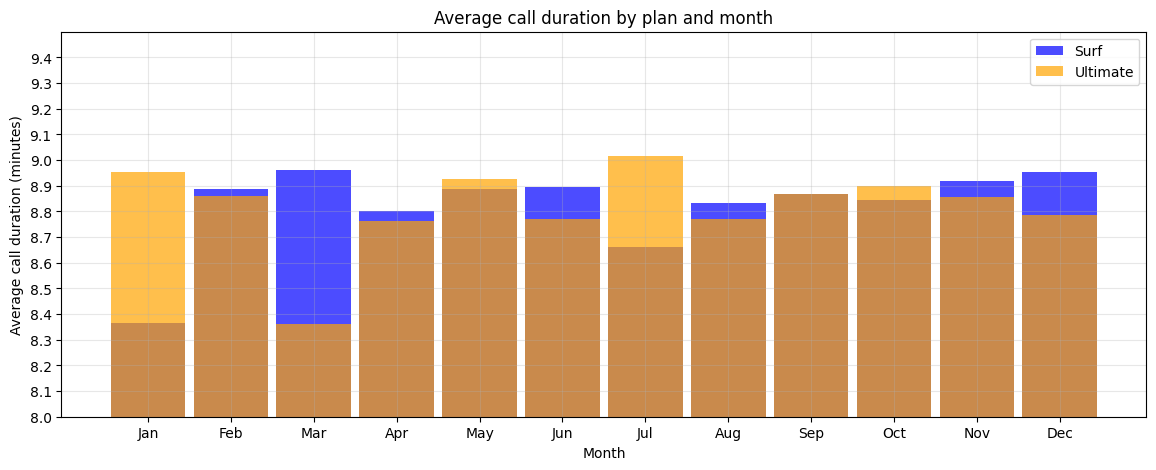

In [264]:
# here goes the chart

# month names
nombres_meses = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# chart
surf_data_calls = llamadas_por_plan_mes['surf']
ultimate_data_calls = llamadas_por_plan_mes['ultimate']

plt.figure(figsize=(14,5))

plt.bar(surf_data_calls.index, surf_data_calls.values,
        alpha=0.7, label = 'Surf', color='Blue', width=.9)

plt.bar(ultimate_data_calls.index, ultimate_data_calls.values,
        alpha=0.7, label='Ultimate', color='orange', width=.9)

plt.yticks(np.arange(8.0, 9.5, 0.1))
plt.ylim(8.0,9.5)
plt.xticks(range(1,13), nombres_meses)
plt.xlabel('Month')
plt.ylabel('Average call duration (minutes)')
plt.title('Average call duration by plan and month')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show



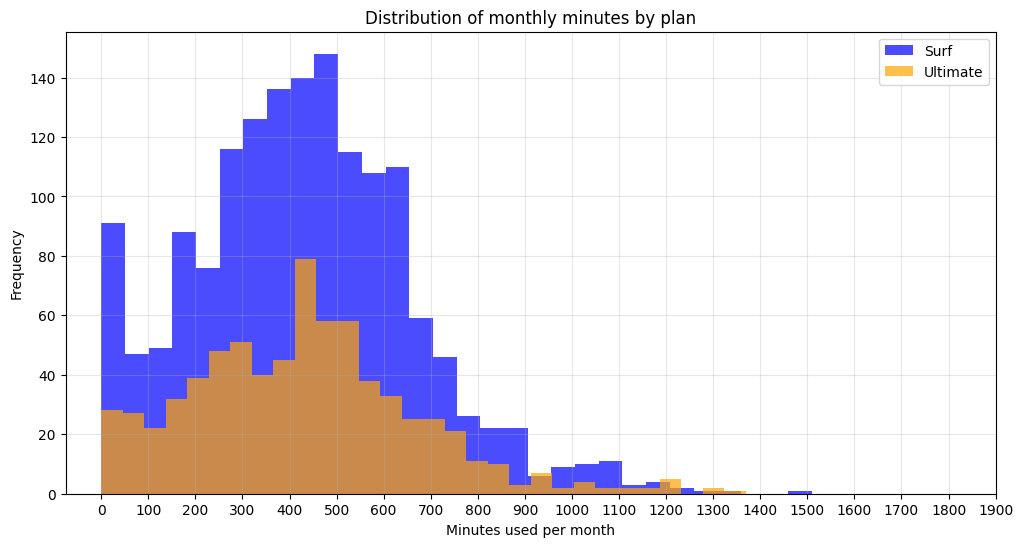

In [265]:

# Compare the monthly minutes required by users of each plan. Plot a histogram.
surf_data_minutes = df_complete[df_complete['plan'] == 'surf']['minutes_used']
ultimate_data_minutes = df_complete[df_complete['plan']=='ultimate']['minutes_used']

plt.figure(figsize=(12,6))
plt.hist(surf_data_minutes, bins=30, alpha=.7, label='Surf', color='blue')
plt.hist(ultimate_data_minutes, bins=30, alpha=.7, label='Ultimate', color='orange')

plt.xticks(range(0,2000,100))
plt.xlabel('Minutes used per month')
plt.title('Distribution of monthly minutes by plan')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



## Call Duration Analysis

We'll calculate the mean and variance of call durations for each plan to determine if Surf and Ultimate users have different calling behaviors.

In [266]:
# Calculate the mean and variance of monthly call duration.
# Extract average call duration:

# For Surf plan
surf_media_por_mes = df_complete[df_complete['plan'] == 'surf'].groupby('month')['minutes_used'].mean()
surf_varianza_por_mes = df_complete[df_complete['plan'] == 'surf'].groupby('month')['minutes_used'].var()

# For  Ultimate plan
ultimate_media_por_mes = df_complete[df_complete['plan'] == 'ultimate'].groupby('month')['minutes_used'].mean()
ultimate_varianza_por_mes = df_complete[df_complete['plan'] == 'ultimate'].groupby('month')['minutes_used'].var()

print("SURF - mean by month:")
print(surf_media_por_mes)
print("\nSURF - Variance by month:")
print(surf_varianza_por_mes)

print("\nULTIMATE - Mean by month:")
print(ultimate_media_por_mes)
print("\nULTIMATE - Variance by month:")
print(ultimate_varianza_por_mes)


SURF - mean by month:
month
1     203.000000
2     297.000000
3     330.000000
4     351.520000
5     399.571429
6     431.288660
7     449.950413
8     410.098765
9     414.190722
10    429.725738
11    423.300353
12    473.820755
Name: minutes_used, dtype: float64

SURF - Variance by month:
month
1     15842.000000
2     52226.500000
3     35809.363636
4     50855.805714
5     59751.537594
6     45592.082474
7     60999.630854
8     54344.884595
9     46589.844266
10    52277.343953
11    51601.452021
12    63628.273763
Name: minutes_used, dtype: float64

ULTIMATE - Mean by month:
month
1     193.500000
2     403.142857
3     304.250000
4     336.857143
5     406.206897
6     370.893617
7     427.067797
8     421.422535
9     437.511628
10    450.716981
11    445.141732
12    459.046358
Name: minutes_used, dtype: float64

ULTIMATE - Variance by month:
month
1     16572.333333
2     76889.476190
3     61984.931818
4     34888.928571
5     43844.741379
6     42492.053654
7     72563.37

C:\Users\pablo\AppData\Local\Temp\ipykernel_6260\1026113168.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_complete, x='plan',y='minutes_used',


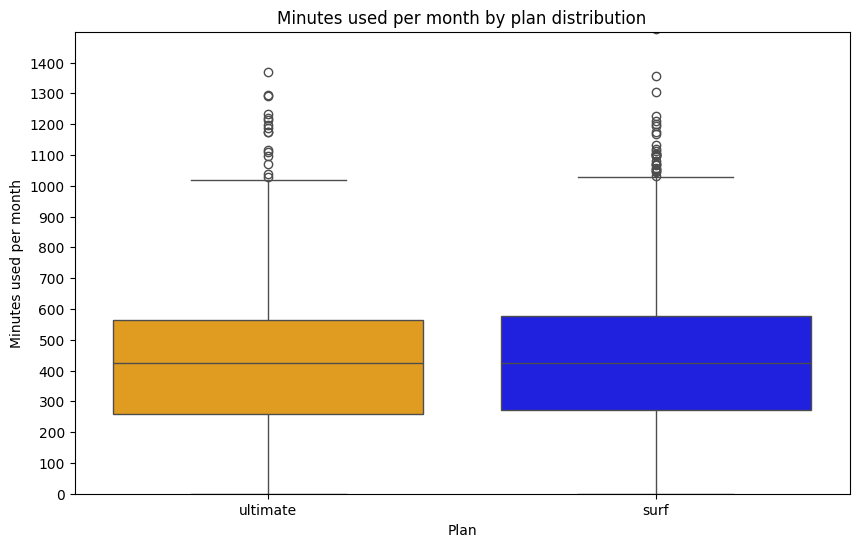

In [267]:

# Draw a box plot to compare the distribution of monthly minutes used by users of each plan.
plt.figure(figsize=(10,6))
sns.boxplot(data = df_complete, x='plan',y='minutes_used',
           palette={'surf':'blue', 'ultimate':'orange'})
plt.title('Minutes used per month by plan distribution')
plt.xlabel('Plan')
plt.ylabel('Minutes used per month')
plt.ylim(0,1500)
plt.yticks(range(0,1500,100))
plt.show()


In [268]:
 # Complete descriptive statistics by plan
print("Complete descriptive statistics by plan:")
print(df_complete.groupby('plan')['minutes_used'].describe())

Complete descriptive statistics by plan:
           count        mean         std  min     25%    50%     75%     max
plan                                                                        
surf      1573.0  428.731087  234.446464  0.0  272.00  425.0  576.00  1510.0
ultimate   720.0  430.419444  240.496957  0.0  259.75  424.0  565.25  1369.0


## Calls Behaivior Conclusions: 


The calling behavior between the Ultimate plan and the Surf plan is very similar, at least in terms of the mean and median, which incidentally have very close values, indicating that the distributions are relatively symmetric. However, some outliers are visible in both distributions. The central measures themselves are uniform, but as also reflected in the histogram, that right skew is due to those outliers that also create the longer whisker in the box plot. Despite this, 75% of the values are symmetric.

In fact, the IQR for Surf is 304 minutes and for the Ultimate plan it's 305.5 minutes. The means being 428.73 for Surf and 430.41 for the Ultimate plan give us to understand that in general, calling behavior is very similar and that customers don't choose the plan type based on the number of calls. There's possibly another more determining factor for making the purchase decision.


### Messages

In [269]:
# Compare the number of messages that users of each plan tend to send each month

# Group and calculate mean
mensajes_por_plan_mes = df_complete.groupby(['plan','month'])['messages_sent'].mean()

# quick look at the result
mensajes_por_plan_mes


plan      month
surf      1        10.500000
          2        12.000000
          3        15.260870
          4        17.400000
          5        24.012987
          6        25.298969
          7        27.033058
          8        28.777778
          9        30.762887
          10       33.839662
          11       32.385159
          12       38.600629
ultimate  1        15.500000
          2        21.571429
          3        20.250000
          4        22.047619
          5        32.103448
          6        29.340426
          7        32.830508
          8        38.478873
          9        37.895349
          10       39.443396
          11       38.606299
          12       45.006623
Name: messages_sent, dtype: float64

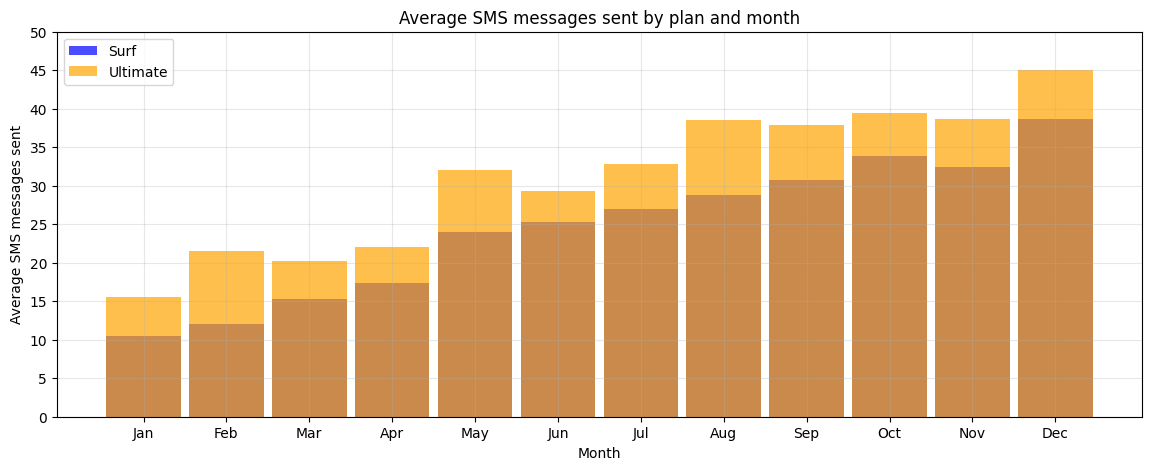

In [270]:

nombres_meses = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# chart
surf_data_messages_month = mensajes_por_plan_mes['surf']
ultimate_data_messages_month = mensajes_por_plan_mes['ultimate']

plt.figure(figsize=(14,5))

plt.bar(surf_data_messages_month.index, surf_data_messages_month.values,
        alpha=0.7, label = 'Surf', color='Blue', width=.9)

plt.bar(ultimate_data_messages_month.index, ultimate_data_messages_month.values,
        alpha=0.7, label='Ultimate', color='orange', width=.9)


plt.yticks(range(0,51,5))
plt.xticks(range(1,13), nombres_meses)
plt.xlabel('Month')
plt.ylabel('Average SMS messages sent')
plt.title('Average SMS messages sent by plan and month')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()




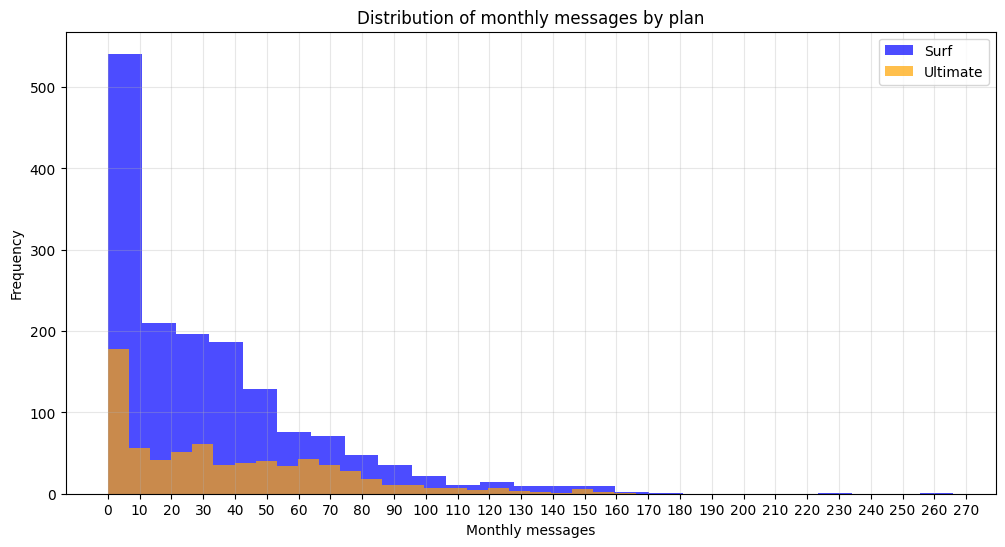

In [271]:

# plot histogram to compare the number of monthly messages that users of each plan tend to send.
surf_data_messages = df_complete[df_complete['plan']=='surf']['messages_sent']
ultimate_data_messages = df_complete[df_complete['plan']=='ultimate']['messages_sent']

# compare the distribution of messages sent per month by plan using a histogram

plt.figure(figsize=(12,6))
plt.hist(surf_data_messages, bins=25, alpha=.7, label='Surf', color='blue')
plt.hist(ultimate_data_messages, bins=25, alpha=.7, label='Ultimate', color='orange')

plt.xticks(range(0,280,10))
plt.xlabel('Monthly messages')
plt.title('Distribution of monthly messages by plan')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()




In [272]:
# Calculate the mean and variance of the messages sent per month.
# For Surf plan

surf_media_por_mes_mensajes = df_complete[df_complete['plan'] == 'surf'].groupby('month')['messages_sent'].mean()
surf_varianza_por_mes_mensajes = df_complete[df_complete['plan'] == 'surf'].groupby('month')['messages_sent'].var()

# For Ultimate plan
ultimate_media_por_mes_mensajes = df_complete[df_complete['plan'] == 'ultimate'].groupby('month')['messages_sent'].mean()
ultimate_varianza_por_mes_mensajes = df_complete[df_complete['plan'] == 'ultimate'].groupby('month')['messages_sent'].var()

print("SURF - Mean by month:")
print(surf_media_por_mes_mensajes)
print("\nSURF - Variance by month:")
print(surf_varianza_por_mes_mensajes)

print("\nULTIMATE - Mean by month:")
print(ultimate_media_por_mes_mensajes)
print("\nULTIMATE - Variance by month:")
print(ultimate_varianza_por_mes_mensajes)




SURF - Mean by month:
month
1     10.500000
2     12.000000
3     15.260870
4     17.400000
5     24.012987
6     25.298969
7     27.033058
8     28.777778
9     30.762887
10    33.839662
11    32.385159
12    38.600629
Name: messages_sent, dtype: float64

SURF - Variance by month:
month
1      220.500000
2      386.000000
3      346.565217
4      501.591837
5      847.197198
6      914.920103
7      923.915565
8     1029.515528
9     1003.829496
10    1275.465708
11    1065.344034
12    1458.158612
Name: messages_sent, dtype: float64

ULTIMATE - Mean by month:
month
1     15.500000
2     21.571429
3     20.250000
4     22.047619
5     32.103448
6     29.340426
7     32.830508
8     38.478873
9     37.895349
10    39.443396
11    38.606299
12    45.006623
Name: messages_sent, dtype: float64

ULTIMATE - Variance by month:
month
1      313.666667
2      478.285714
3      654.386364
4      544.147619
5     1297.310345
6      857.620722
7      960.488019
8     1196.367404
9     1050.918331

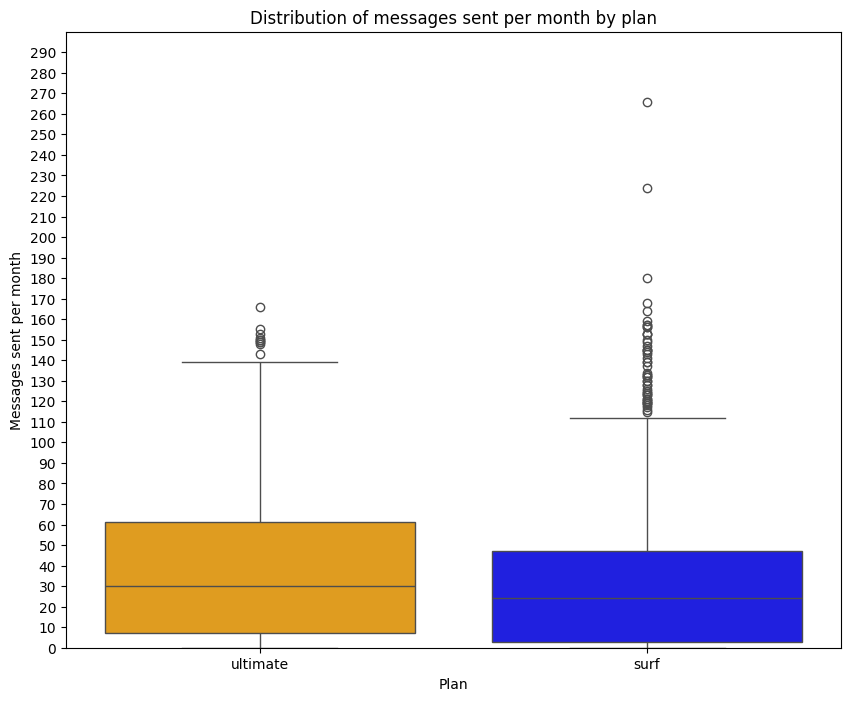

In [273]:
# Compare the distribution of messages sent per month by plan using a box plot.

plt.figure(figsize=(10,8))
sns.boxplot(data = df_complete, x='plan',y='messages_sent', hue='plan',
            palette = {'surf':'blue', 'ultimate':'orange'})
plt.title('Distribution of messages sent per month by plan')
plt.xlabel('Plan')
plt.ylabel('Messages sent per month')
plt.ylim(0,300)
plt.yticks(range(0,300,10))
plt.show()


In [274]:

print('Statistics by plan: ')
print(df_complete.groupby('plan')['messages_sent'].describe())


Statistics by plan: 
           count       mean        std  min  25%   50%   75%    max
plan                                                               
surf      1573.0  31.159568  33.566717  0.0  3.0  24.0  47.0  266.0
ultimate   720.0  37.551389  34.767179  0.0  7.0  30.0  61.0  166.0


## Messages Behaivior Conclusions:

In the case of SMS, the number of messages sent per plan does have more variation. There are some things that catch my attention about user behavior. First, the increase in messages sent at the end of the year, which could very possibly be due to the holidays.

Ultimate users generally send more messages than Surf users. Although in both cases we have right-skewed distributions (users who sent too many messages atypically).

What's interesting is that despite WhatsApp being completely installed worldwide by 2018, many users used this channel, and there's clearly an interesting revenue opportunity from charging for additional messages for the Surf plan. Ultimate plan users would hardly exhaust their included messages (1000 is a lot).

As an interesting fact, the IQR of Ultimate users is 54 and that of Surf users is 44, which also suggests greater variation within the Ultimate users' dataset.

Another interesting fact I noticed in the histogram is that a large frequency of users was in the group of less than 10 messages sent, which confirms that many of them might already be using internet messaging instead of SMS. I suspect that Ultimate plan users are older overall and possibly therefore may be more interested in communicating via SMS.

75% of Ultimate plan users sent fewer than 61 messages, 75% of Surf plan users didn't use the 50 SMS included in the plan.


### Internet

In [275]:
# compare the amount of Internet traffic consumed by users by plan
# group and calculate mean

gb_por_plan_mes = df_complete.groupby(['plan','month'])['gb_used'].mean()

# quick look at the result
gb_por_plan_mes


plan      month
surf      1         5.000000
          2        12.222222
          3        13.565217
          4        12.220000
          5        14.116883
          6        15.484536
          7        16.876033
          8        16.882716
          9        16.690722
          10       17.409283
          11       16.431095
          12       18.238994
ultimate  1         7.250000
          2        17.285714
          3        18.416667
          4        16.333333
          5        16.862069
          6        15.425532
          7        16.491525
          8        17.845070
          9        17.011628
          10       17.716981
          11       17.118110
          12       18.397351
Name: gb_used, dtype: float64

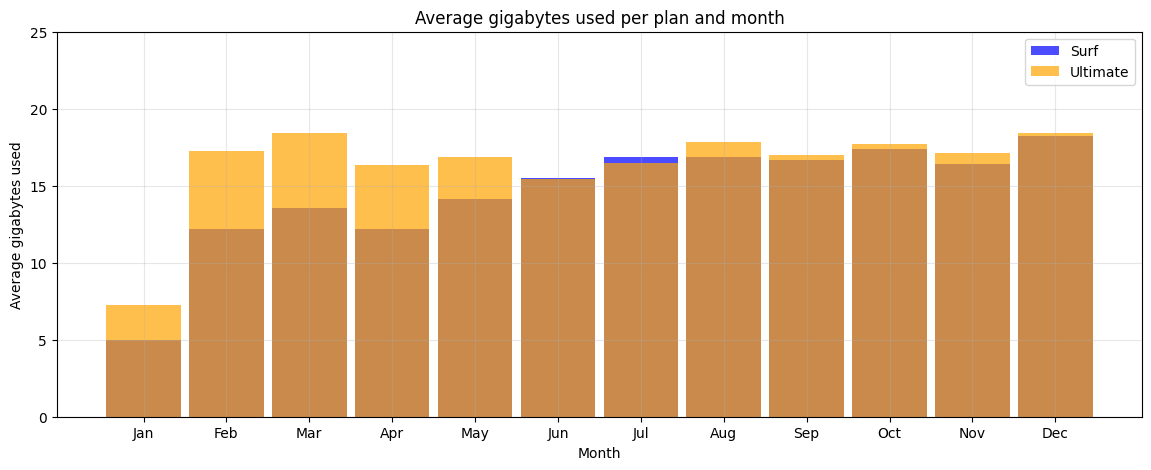

In [276]:
#chart
surf_data_gb_month = gb_por_plan_mes['surf']
ultimate_data_gb_month = gb_por_plan_mes['ultimate']

plt.figure(figsize=(14,5))

plt.bar(surf_data_gb_month.index, surf_data_gb_month.values,
        alpha=0.7, label = 'Surf', color='Blue', width=.9)

plt.bar(ultimate_data_gb_month.index, ultimate_data_gb_month.values,
        alpha=0.7, label='Ultimate', color='orange', width=.9)


plt.yticks(range(0,26,5))
plt.xticks(range(1,13), nombres_meses)
plt.xlabel('Month')
plt.ylabel('Average gigabytes used')
plt.title('Average gigabytes used per plan and month')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()




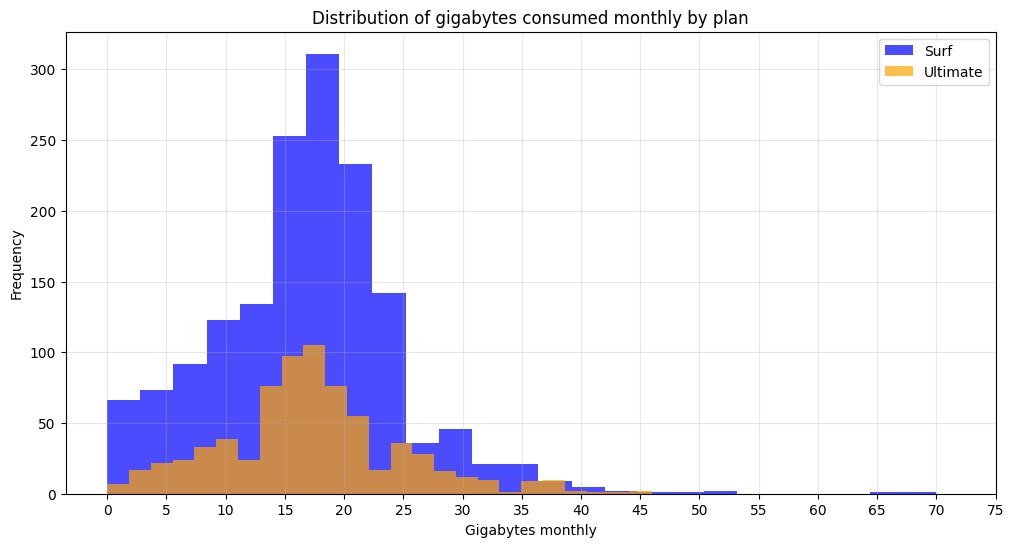

In [277]:
# histogram
surf_data_gb = df_complete[df_complete['plan']=='surf']['gb_used']
ultimate_data_gb = df_complete[df_complete['plan']=='ultimate']['gb_used']

# comparison of the number of monthly gb needed by users of each plan. Plot a histogram.

plt.figure(figsize=(12,6))
plt.hist(surf_data_gb, bins=25, alpha=.7, label='Surf', color='blue')
plt.hist(ultimate_data_gb, bins=25, alpha=.7, label='Ultimate', color='orange')

plt.xticks(range(0,80,5))
plt.xlabel('Gigabytes monthly')
plt.title('Distribution of gigabytes consumed monthly by plan')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [278]:
# Calculate the mean and variance of monthly GB used.
# Surf plan:

surf_media_por_mes_gb = df_complete[df_complete['plan'] == 'surf'].groupby('month')['gb_used'].mean()
surf_varianza_por_mes_gb = df_complete[df_complete['plan'] == 'surf'].groupby('month')['gb_used'].var()

# Ultimate plan:
ultimate_media_por_mes_gb = df_complete[df_complete['plan'] == 'ultimate'].groupby('month')['gb_used'].mean()
ultimate_varianza_por_mes_gb = df_complete[df_complete['plan'] == 'ultimate'].groupby('month')['gb_used'].var()

print("SURF - Mean by month:")
print(surf_media_por_mes_gb)
print("\nSURF - Variance by month:")
print(surf_varianza_por_mes_gb)

print("\nULTIMATE - Mean by month:")
print(ultimate_media_por_mes_gb)
print("\nULTIMATE - Variance by month:")
print(ultimate_varianza_por_mes_gb)


SURF - Mean by month:
month
1      5.000000
2     12.222222
3     13.565217
4     12.220000
5     14.116883
6     15.484536
7     16.876033
8     16.882716
9     16.690722
10    17.409283
11    16.431095
12    18.238994
Name: gb_used, dtype: float64

SURF - Variance by month:
month
1     18.000000
2     41.444444
3     63.984190
4     56.215918
5     58.183527
6     47.752363
7     61.476171
8     71.420942
9     49.240639
10    60.725846
11    54.607824
12    69.210841
Name: gb_used, dtype: float64

ULTIMATE - Mean by month:
month
1      7.250000
2     17.285714
3     18.416667
4     16.333333
5     16.862069
6     15.425532
7     16.491525
8     17.845070
9     17.011628
10    17.716981
11    17.118110
12    18.397351
Name: gb_used, dtype: float64

ULTIMATE - Variance by month:
month
1      14.916667
2      37.904762
3     138.628788
4      85.833333
5      54.194581
6      68.858464
7      64.254237
8      58.047082
9      47.258687
10     54.604852
11     54.390701
12     58.841060

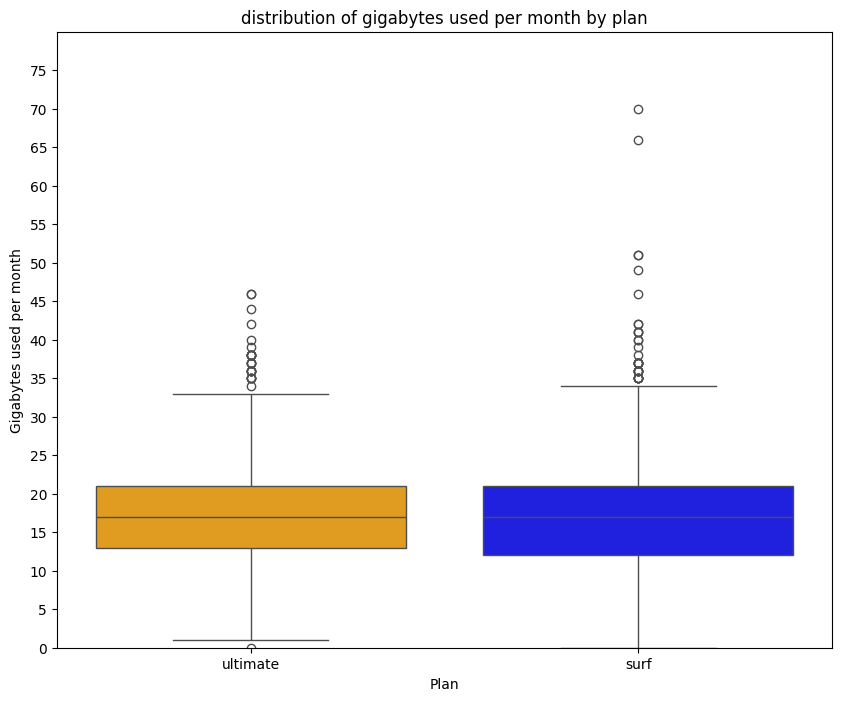

In [279]:
# Draw a box plot to compare the distribution of monthly GB used by users of each plan.

plt.figure(figsize=(10,8))
sns.boxplot(data = df_complete, x='plan',y='gb_used', hue='plan',
           palette={'surf':'blue', 'ultimate':'orange'})
plt.title('distribution of gigabytes used per month by plan')
plt.xlabel('Plan')
plt.ylabel('Gigabytes used per month')
plt.ylim(0,80)
plt.yticks(range(0,80,5))
plt.show()



In [280]:
print('Descriptive statistics by plan: ')
print(df_complete.groupby('plan')['gb_used'].describe())

Descriptive statistics by plan: 
           count       mean       std  min   25%   50%   75%   max
plan                                                              
surf      1573.0  16.670693  7.847522  0.0  12.0  17.0  21.0  70.0
ultimate   720.0  17.306944  7.670108  0.0  13.0  17.0  21.0  46.0


The means are very similar, I'm struck by the fact that the Surf plan mean exceeds the GB included in the plan. Additionally, both medians are at 17 GB of consumption. Many Surf users exceed their data consumption.

The GB consumption distribution also appears symmetric, I'm struck by the fact that the outliers for Surf users are higher than those for Ultimate users. The heavy users of the Surf plan apparently consume more than the heavy users of the Ultimate plan.

Clearly this is where the company's business is: in consumption, I look forward to seeing conclusions from the revenue distributions.


## Revenue

Next, we will statistically analyze the revenue generated by each rate plan (Surf and Ultimate). Just as we studied user behavior in calls, messages, and internet usage, we will now examine how these usage patterns translate into revenue for Megaline.

In [281]:
# compare the amount of traffic of the total cost paid per month
# Group and calculate mean

costo_por_plan_mes = df_complete.groupby(['plan','month'])['costo_total'].median() #aquí utilizaré la mediana ya que cuando lo hice con la media, los valores se encontraban incluenciados por los valores atípicos. 

#quick look at the result
costo_por_plan_mes


plan      month
surf      1        20.000
          2        29.570
          3        20.000
          4        20.000
          5        21.740
          6        30.150
          7        40.330
          8        41.980
          9        40.045
          10       50.000
          11       40.000
          12       50.000
ultimate  1        70.000
          2        70.000
          3        70.000
          4        70.000
          5        70.000
          6        70.000
          7        70.000
          8        70.000
          9        70.000
          10       70.000
          11       70.000
          12       70.000
Name: costo_total, dtype: float64

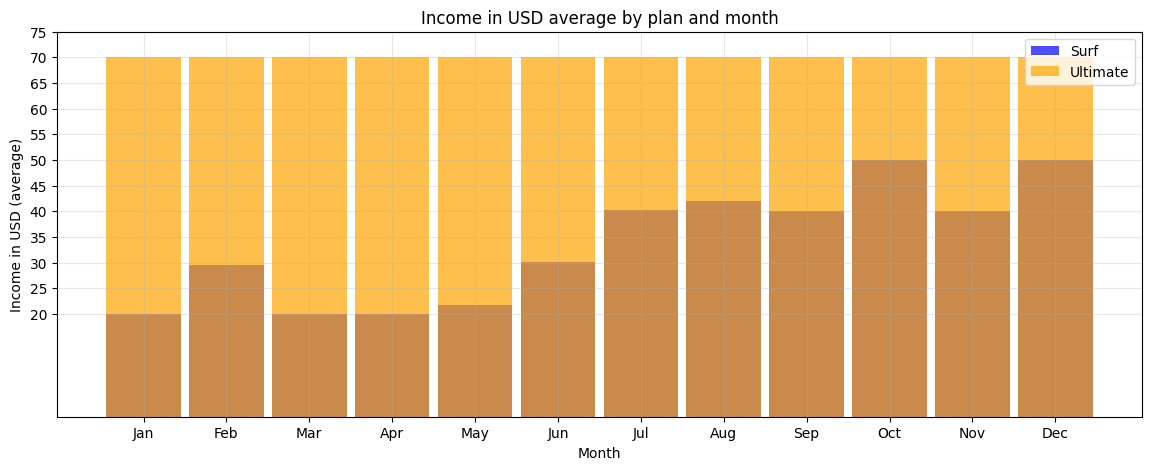

In [282]:

# chart
surf_data_income_month = costo_por_plan_mes['surf']
ultimate_data_income_month = costo_por_plan_mes['ultimate']

plt.figure(figsize=(14,5))

plt.bar(surf_data_income_month.index, surf_data_income_month.values,
        alpha=0.7, label = 'Surf', color='Blue', width=.9)

plt.bar(ultimate_data_income_month.index, ultimate_data_income_month.values,
        alpha=0.7, label='Ultimate', color='orange', width=.9)


plt.yticks(range(20,80,5))
plt.xticks(range(1,13), nombres_meses)
plt.xlabel('Month')
plt.ylabel('Income in USD (average)')
plt.title('Income in USD average by plan and month')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()




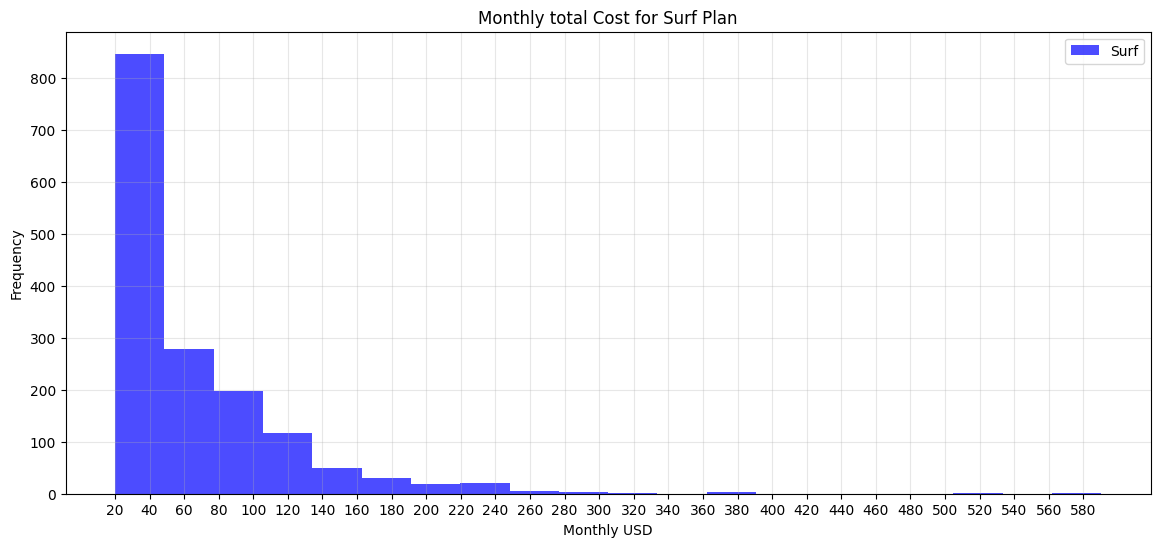

In [283]:
# histogram
surf_data_income = df_complete[df_complete['plan']=='surf']['costo_total']
ultimate_data_income = df_complete[df_complete['plan']=='ultimate']['costo_total']

# comparison of the amount of traffic of the total cost paid per month.

plt.figure(figsize=(14,6))

plt.hist(surf_data_income, bins=20, alpha=.7, label='Surf', color='blue')

plt.xticks(range(20,600,20))
plt.xlabel('Monthly USD')
plt.title('Monthly total Cost for Surf Plan')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


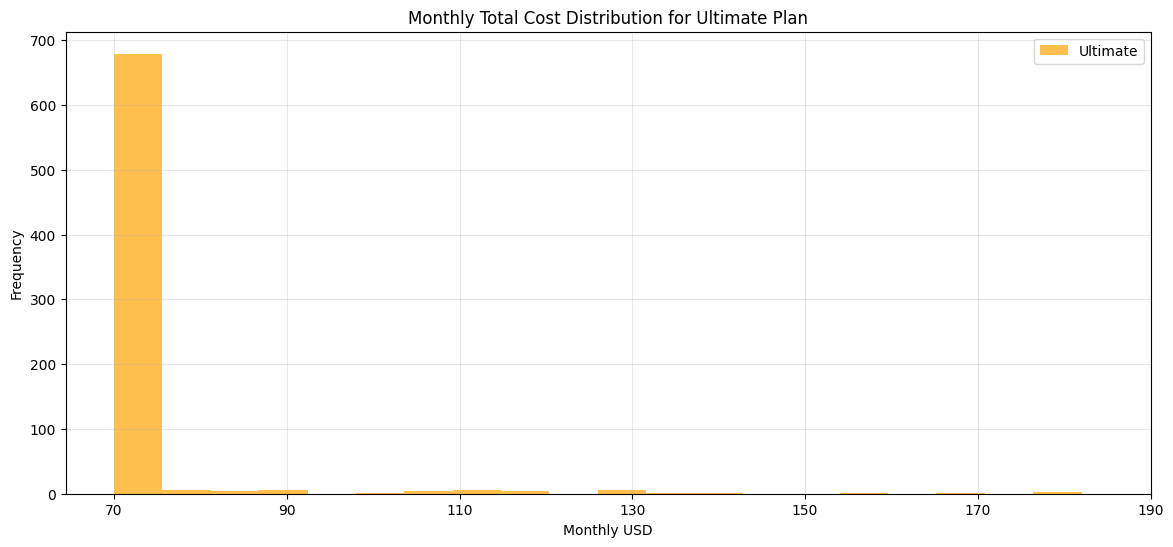

In [284]:
plt.figure(figsize=(14,6))


plt.hist(ultimate_data_income, bins=20, alpha=.7, label='Ultimate', color='orange')

plt.xticks(range(70,200,20))
plt.xlabel('Monthly USD')
plt.title('Monthly Total Cost Distribution for Ultimate Plan')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()




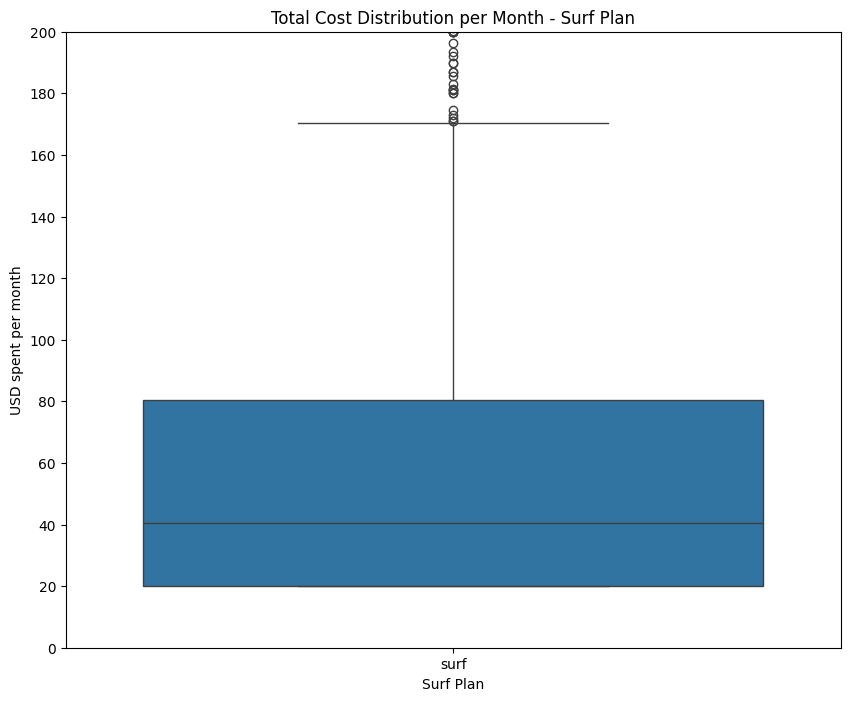

In [285]:
# Plot a box plot to compare the distribution of the total monthly cost by plan.
# Surf plan:
surf_data = df_complete[df_complete['plan']== 'surf']
plt.figure(figsize=(10,8))
sns.boxplot(data = surf_data, x='plan',y='costo_total',)
plt.title('Total Cost Distribution per Month - Surf Plan')
plt.xlabel('Surf Plan')
plt.ylabel('USD spent per month')
plt.ylim(0,200)
plt.yticks(range(0,201,20))
plt.show()


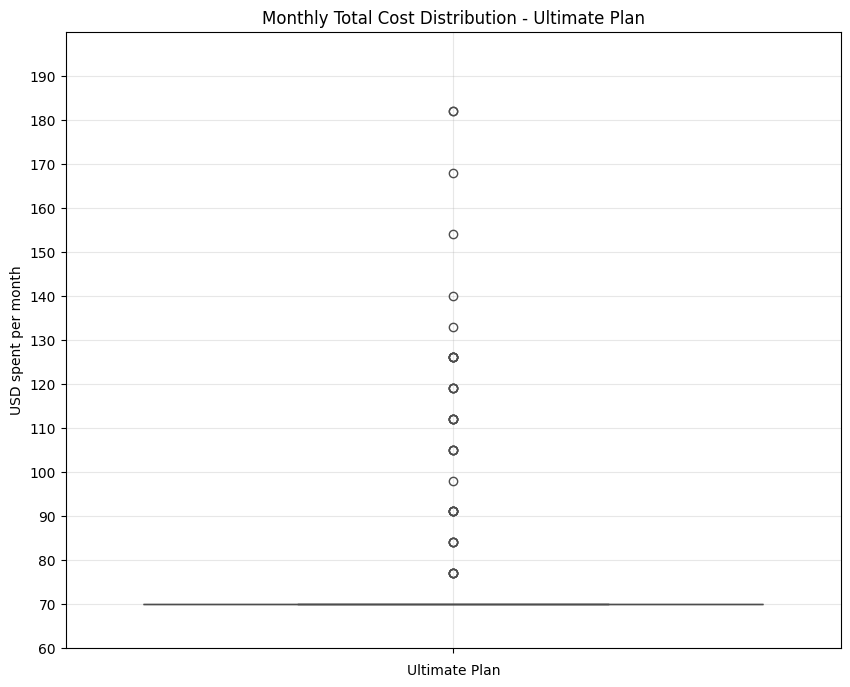

In [286]:
# Box plot for ultimate plan (they are not readable together)
ultimate_data = df_complete[df_complete['plan']=='ultimate']

plt.figure(figsize=(10,8))
sns.boxplot(data = ultimate_data, y='costo_total', color='orange')
plt.title('Monthly Total Cost Distribution - Ultimate Plan')
plt.ylabel('USD spent per month')
plt.xlabel('Ultimate Plan')
plt.ylim(60,200)
plt.yticks(range(60,200,10))
plt.grid(True,alpha=.3)
plt.show()

In [287]:
print('Descriptive statistics by plan: ')
print(df_complete.groupby('plan')['costo_total'].describe())

Descriptive statistics by plan: 
           count       mean        std   min   25%    50%    75%     max
plan                                                                    
surf      1573.0  60.706122  55.387923  20.0  20.0  40.36  80.36  590.37
ultimate   720.0  72.313889  11.395108  70.0  70.0  70.00  70.00  182.00


In [288]:
# Total Revenue by plan: 

ingreso_total_por_plan = df_complete.groupby('plan')['costo_total'].sum()
print("Revenue by plan:")
print(f"Surf Plan: ${ingreso_total_por_plan['surf']:,.2f}")
print(f"Ultimate Plan: ${ingreso_total_por_plan['ultimate']:,.2f}")
print(f"Total Combined Revenue: ${ingreso_total_por_plan.sum():,.2f}")


# Count users by plan
usuarios_por_plan = df_complete['plan'].value_counts()
print("User distribution by plan:")
print(f"Surf Plan: {usuarios_por_plan['surf']} records")
print(f"Ultimate Plan: {usuarios_por_plan['ultimate']} records")

# unique users by plan

usuarios_unicos_por_plan = df_complete.groupby('plan')['user_id'].nunique()
print(f"\nUnique users by plan:")
print(f"Surf Plan: {usuarios_unicos_por_plan['surf']} users")
print(f"Ultimate Plan: {usuarios_unicos_por_plan['ultimate']} users")

# Percentages of users by plan
total_registros = len(df_complete)
print(f"\nPercentages of users by plan:")
print(f"Surf Plan: {usuarios_por_plan['surf']/total_registros*100:.1f}%")
print(f"Ultimate Plan: {usuarios_por_plan['ultimate']/total_registros*100:.1f}%")


#Average revenue per user by plan:
ingreso_promedio_por_usuario = df_complete.groupby('plan')['costo_total'].mean() #crear variable de ingreso promedio por usuario 
print('Average monthly revenue per user:')
print(f"Surf Plan: ${ingreso_promedio_por_usuario['surf']:.2f}")
print(f"Ultimate Plan: ${ingreso_promedio_por_usuario['ultimate']:.2f}")



Revenue by plan:
Surf Plan: $95,490.73
Ultimate Plan: $52,066.00
Total Combined Revenue: $147,556.73
User distribution by plan:
Surf Plan: 1573 records
Ultimate Plan: 720 records

Unique users by plan:
Surf Plan: 333 users
Ultimate Plan: 157 users

Percentages of users by plan:
Surf Plan: 68.6%
Ultimate Plan: 31.4%
Average monthly revenue per user:
Surf Plan: $60.71
Ultimate Plan: $72.31


## Revenue Comparison Conclusions

Surf Plan Analysis:

The revenue distribution of the Surf plan has a right skew, with many outliers. A value of 590.37 pulls the mean too far to the right, therefore it's more useful to study the median. In the months after June, the median generally exceeded the base plan cost, apparently in a significant way. However, the months with the greatest increase were February, October, and December, which coincide with being holiday months in the United States (Valentine's Day, Halloween, and Christmas).

Ultimate Plan Analysis:

The revenue distribution of the Ultimate plan is generally very compressed except for some outliers. In fact, that's why in the box plot it has neither a box nor whiskers. When observing the general statistics with describe, we see that the minimum is 70 (which is the monthly fee), and Q1, the median, and Q3 are all 70. This indicates that Ultimate plan users basically don't pay more in general. I could think that Ultimate users choose their plan because they want to always pay the same amount - this very likely gives them confidence.

Overall Analysis:

Analyzing the additional data, we observe that the total revenue from the Surf plan is double that of the Ultimate plan, and the number of users is also approximately double. These are interesting data points.




## Statistical Hypotheses Test


Null hypothesis = The average revenue between Ultimate and Surf plans is equal (no difference)

Alternative hypothesis = The average revenue between Ultimate and Surf plans is different

The type of test will be an independent t-test. With a confidence level of 5%

In [289]:
# Hypothesis testing: Compare the variance ratio.

# extracting the total cost for each plan to calculate variance
surf_ingresos = df_complete[df_complete['plan']== 'surf']['costo_total']
ultimate_ingresos = df_complete[df_complete['plan']=='ultimate']['costo_total']

varianza_surf = surf_ingresos.var()
varianza_ultimate = ultimate_ingresos.var()


print(f"Surf Plan Variance: {varianza_surf:.2f}")
print(f"Ultimate Plan Variance: {varianza_ultimate:.2f}")
print(f"Variance Ratio: {varianza_surf/varianza_ultimate:.2f}")

Surf Plan Variance: 3067.82
Ultimate Plan Variance: 129.85
Variance Ratio: 23.63


In [290]:
# perform independent samples t-test
alpha = 0.05

# t-test
results = st.ttest_ind(surf_ingresos,ultimate_ingresos, equal_var=False)
print('p-value:', results.pvalue)

# Compare the p-value with the threshold to determine whether to reject the null hypothesis
if results.pvalue < alpha: 
    print('We reject the null hypothesis')
else:
    print('We cannot reject the null hypothesis')



p-value: 3.165158644244061e-15
We reject the null hypothesis


In [291]:
print(f"Average Surf revenue: {surf_ingresos.mean():.2f}")
print(f"Average Ultimate revenue: {ultimate_ingresos.mean():.2f}")
print(f"Surf revenue median: {surf_ingresos.median():.2f}")
print(f"Ultimate revenue median: {ultimate_ingresos.median():.2f}")

Average Surf revenue: 60.71
Average Ultimate revenue: 72.31
Surf revenue median: 40.36
Ultimate revenue median: 70.00


Null hypothesis = The average revenue from users in the NY-NJ area would not be different from the average revenue from users from other regions.

Alternative hypothesis = The average revenue of users in the New York-New Jersey area is different from the average revenue from users in other regions.

The type of test will be an independent samples t-test with a 5% significance level.

In [292]:
# Show unique cities in the dataset
ciudades = (df_complete['city'].unique())
ciudades = sorted(ciudades)
print(ciudades)

['Albany-Schenectady-Troy, NY MSA', 'Albuquerque, NM MSA', 'Atlanta-Sandy Springs-Roswell, GA MSA', 'Austin-Round Rock-Georgetown, TX MSA', 'Bakersfield, CA MSA', 'Baltimore-Columbia-Towson, MD MSA', 'Baton Rouge, LA MSA', 'Birmingham-Hoover, AL MSA', 'Boston-Cambridge-Newton, MA-NH MSA', 'Bridgeport-Stamford-Norwalk, CT MSA', 'Buffalo-Cheektowaga, NY MSA', 'Cape Coral-Fort Myers, FL MSA', 'Charleston-North Charleston, SC MSA', 'Charlotte-Concord-Gastonia, NC-SC MSA', 'Chicago-Naperville-Elgin, IL-IN-WI MSA', 'Cincinnati, OH-KY-IN MSA', 'Cleveland-Elyria, OH MSA', 'Colorado Springs, CO MSA', 'Columbia, SC MSA', 'Columbus, OH MSA', 'Dallas-Fort Worth-Arlington, TX MSA', 'Dayton-Kettering, OH MSA', 'Denver-Aurora-Lakewood, CO MSA', 'Detroit-Warren-Dearborn, MI MSA', 'El Paso, TX MSA', 'Fresno, CA MSA', 'Grand Rapids-Kentwood, MI MSA', 'Greensboro-High Point, NC MSA', 'Houston-The Woodlands-Sugar Land, TX MSA', 'Indianapolis-Carmel-Anderson, IN MSA', 'Jacksonville, FL MSA', 'Kansas City, 

In [293]:
# Hypotheses test:
# Prepare data:
ingresos_nueva_york_jersey = df_complete[df_complete['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA']['costo_total']
ingresos_otras_ciudades = df_complete[df_complete['city']!='New York-Newark-Jersey City, NY-NJ-PA MSA']['costo_total'] 

# check users from NY-NJ
ingresos_nueva_york_jersey.describe()

count    377.000000
mean      59.921034
std       43.537659
min       20.000000
25%       20.000000
50%       51.770000
75%       72.460000
max      280.000000
Name: costo_total, dtype: float64

In [294]:
#Check users from other cities
ingresos_otras_ciudades.describe()

count    1916.000000
mean       65.222599
std        47.170353
min        20.000000
25%        24.927500
50%        70.000000
75%        70.000000
max       590.370000
Name: costo_total, dtype: float64

In [295]:
# Variance ratio test:
varianza_ny_nj = ingresos_nueva_york_jersey.var()
varianza_otras = ingresos_otras_ciudades.var()

print(f"The variance of the NY-NJ population is: {varianza_ny_nj:.2f}")
print(f"The variance of the other cities population is: {varianza_otras:.2f}")
print(f"Variance Ratio: {varianza_otras/varianza_ny_nj:.2f}")

The variance of the NY-NJ population is: 1895.53
The variance of the other cities population is: 2225.04
Variance Ratio: 1.17


In [296]:
#Hypothesis test: Independent samples t-test

alpha = .05

city_results = st.ttest_ind(ingresos_nueva_york_jersey, ingresos_otras_ciudades, equal_var=True)
print('p-value: ', city_results.pvalue)

if city_results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We cannot reject the null hypothesis')

p-value:  0.04355127339387589
We reject the null hypothesis


## Conclusión general


#diferencias plan surf vs ultimate
Rechazamos la hipótesis de que el ingreso promedio no varía entre los planes diferentes (surf y ultimate), el plan ultimate genera significativamente más ingresos promedio que el plan surf. aunque es importante considerar que como ingreso global, el plan surf generó el 68.6% de los ingresos de la compaía en todo el año con 333 usuarios, mientras que el plan ultimate generó el 31.4% con 157 usuarios. existen muchos valores atípicos y lo que acercó un poco las medias, pero las medianas de los ingresos entre un plan y otro reflejaron 40.36 (plan surf) y 70(plan ultimate), podemos inferir que el cliente ultimate es un usuario que básicamente paga la misma cantidad mes a mes y por ello tiene menor variabilidad, el plan ultimate está muy completo por lo que dificilmente se terminan las llamadas y los GB incluidos, el plan surf al estar más limitado, los usuarios si llegan a pasarse más de llamadas y del GB utilizados (sobre todo ésta última) por lo que podría existir una oportunidad de negocio respecto a algún plan adicional o hacer campañas para que durante los últimos meses del año, los usuarios surf se pasen al plan ultimate ya que en ocasiones llegan a gastarse más del costo del plan ultimate (Sería una buena forma de comunicar los beneficios a los usuarios surf)

#Conclusiones NY-NJ vs otras ciudades
Los resultados sugieren una diferencia marginalmente significativa entre NY-NJ y otras regiones (p = 0.044). Esta diferencia es estadísticamente significativa al nivel alpha = 0.05, pero no al nivel más estricto de alpha = 0.01. a groso modo podemos concluir que estadísticamente son distintos los ingresos de NY-NJ vs otras ciudades.



General Conclusion
Differences between Surf vs Ultimate plans
We reject the hypothesis that average revenue does not vary between different plans (Surf and Ultimate). The Ultimate plan generates significantly higher average revenue than the Surf plan.

However, it is important to consider that, in terms of overall revenue, the Surf plan generated 68.6% of the company's revenue throughout the year with 333 users, while the Ultimate plan generated 31.4% with 157 users.

There are many outliers that brought the means closer together, but the revenue medians showed clear differences: $40.36 (Surf plan) vs $70 (Ultimate plan).

We can infer that:

Ultimate customers are users who basically pay the same amount month to month, resulting in lower variability
The Ultimate plan is very comprehensive, so users rarely exceed the included calls and GB
The Surf plan, being more limited, leads users to exceed their call and GB allowances (especially data usage)
Business opportunity: During the final months of the year, many Surf users spend more than what the Ultimate plan costs. This presents an opportunity to create promotional campaigns or introduce an intermediate plan to encourage these users to switch to Ultimate.

Conclusions NY-NJ vs other cities
The results suggest a marginally significant difference between NY-NJ and other regions (p = 0.044). This difference is statistically significant at the α = 0.05 level, but not at the more stringent α = 0.01 level. Overall, we can conclude that NY-NJ revenues are statistically different from other cities.